# SAVE-A

## Sistema de Análisis y Recomendación de Compras. Toma la mejor decisión.
## (versión Amazon)

### Por Karla Esther Escamilla Gachuz

![SAVE-A Logo](logo.png)

### “Las ventas minoristas en línea representaron aproximadamente el 19% del total de las ventas minoristas a nivel mundial.” (UNCTAD, 2020)

![ecommerce](un.png)

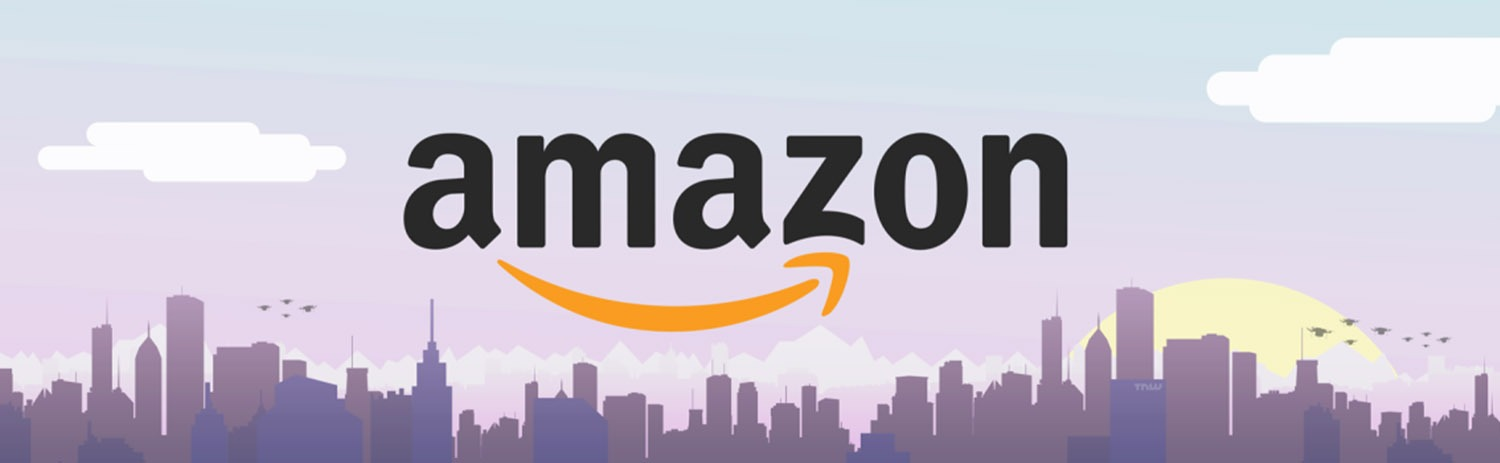

In [15]:
Image(filename='Banner-Amazon-fraudes-blog.jpg')

#####    ** Descripción del proyecto: 
   El sistema SAVE-A (Sistema de Análisis y Recomendación de Compras) es una solución práctica diseñada para abordar el desafío de las compras en línea, un mercado volátil que puede ofrecer diferentes ofertas para el mismo producto. El sistema utiliza una base de datos de productos de Amazon, uno de los sitios de compras en línea más influyentes, y aplica un modelo basado en métricas como el número de calificaciones, el rating, el precio con descuento y el precio actual.

 #####   ** La funcionalidad básica de un rastreador de precios web incluye:
        
        - Recopilación de la base de datos: 
        El sistema recopila los datos de productos mediante técnicas como el web scraping utilizando herramientas como Selenium, Beautiful Soup o servicios de APIs. También puede utilizar una base de datos existente a la que se tenga acceso.

        - Limpieza de los datos: 
        Se realiza una limpieza de los datos recopilados para asegurar su calidad y coherencia. Esto implica eliminar duplicados, corregir errores y normalizar la información.

        - Análisis con el modelo: 
        El sistema utiliza un modelo basado en métricas para analizar los datos de los productos. Estas métricas pueden incluir el número de calificaciones, el rating, el precio con descuento y el precio actual. El modelo evalúa estas métricas y selecciona las tres mejores ofertas que sean amigables tanto para la cartera del comprador como para su tranquilidad.

        - Visualización de resultados: 
        El sistema muestra los resultados del análisis de manera clara y comprensible para el usuario. Puede proporcionar información detallada sobre las ofertas seleccionadas, incluyendo sus métricas relevantes y enlaces directos a las páginas de compra.

In [2]:
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scraper_api import ScraperAPIClient
from IPython.display import Image

# 1 ) Recopilación de la base de datos

### Opción 1: Requests y Beautiful Soup

#### El usuario ingresa su busqueda

In [20]:
search_term = input("Ingrese el término de búsqueda: ")

Ingrese el término de búsqueda: Libros


#### Obtenemos la URL de búsqueda de Amazon utilizando el fragmento HTML proporcionado.

In [14]:
def get_url(search_term):
    template = 'https://www.amazon.com.mx/s?field-keywords={}'
    search_url = template.format(search_term)
    return search_url

#### Navegamos a la página de resultados de Amazon con la url obtenida y obtenemos el contenido HTML.

In [15]:
search_url = get_url(search_term)
response = requests.get(search_url)
soup = BeautifulSoup(response.text, 'html.parser')

#### Extraemos datos relevantes:

In [16]:
product_titles = soup.find_all('span', class_='a-size-small a-text-normal')
author_names = soup.find_all('span', class_='a-size-small a-text-normal')
product_ratings = soup.find_all('span', class_='a-icon-alt')
product_prices = soup.find_all('span', class_='a-price-whole-number')

#### Creamos un DataFrame con la información obtenida

In [17]:
results = []
for i in range(len(product_titles)):
    results.append({
        'Title': product_titles[i].text.strip(),
        'Author': author_names[i].text.strip(),
        'Rating': product_ratings[i].text.strip(),
        'Price': product_prices[i].text.strip()
    })

results_df = pd.DataFrame(results, columns=['Title', 'Author', 'Rating', 'Price'])
results_df.to_csv('amazon_products.csv', index=False, encoding='utf-8')

In [18]:
results_df.describe()

,Title,Author,Rating,Price
count,0,0,0,0
unique,0,0,0,0
top,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN


In [ ]:
#Creamos un ambiente gráfico que muestre los resultados
#(Dashboard en desarrollo)

import plotly.graph_objs as go
import plotly.offline as pyo

fig = go.Figure([go.Bar(x=data, y=data)])
pyo.plot(fig, filename='amazon_prices.html')

### Opción 2: ScraperAPI y BeautifulSoup

In [3]:
api_key = '0bc3974dce823b3fed560bc2450661e3'
client = ScraperAPIClient(api_key)

search_term = input("Ingrese el término de búsqueda: ")
search_url = f'https://www.amazon.com.mx/s?field-keywords={search_term}'

response = client.get(search_url)

Ingrese el término de búsqueda: Libros


In [4]:
soup = BeautifulSoup(response.content, 'html.parser')

In [5]:
product_titles = soup.find_all('span', class_='a-size-small a-text-normal')
author_names = soup.find_all('span', class_='a-size-small a-text-normal')
product_ratings = soup.find_all('span', class_='a-icon-alt')
product_prices = soup.find_all('span', class_='a-price-whole-number')

In [6]:
results = []
for i in range(len(product_titles)):
    results.append({
        'Title': product_titles[i].text.strip(),
        'Author': author_names[i].text.strip(),
        'Rating': product_ratings[i].text.strip(),
        'Price': product_prices[i].text.strip()
    })

results_df = pd.DataFrame(results, columns=['Title', 'Author', 'Rating', 'Price'])
results_df.to_csv('amazon_products.csv', index=False, encoding='utf-8')

In [7]:
results_df.describe()

,Title,Author,Rating,Price
count,0,0,0,0
unique,0,0,0,0
top,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN


### Opción 3: Base de Datos con acceso

        - Kaggle es una plataforma en línea que alberga competiciones de ciencia de datos, proporciona conjuntos de datos públicos y ofrece un entorno de trabajo colaborativo para que los científicos de datos puedan compartir y colaborar en proyectos. 

##### **Sobre el dataset utilizado
        - Este es un conjunto de datos de ventas de productos obtenidos de la página web de Amazon.
            - Los datos del producto están separados por 142 categorías en formato CSV, junto con el nombre completo del conjunto de datos Amazon-Products.csv.
            - Cada archivo CSV consta de 10 columnas y cada fila tiene los detalles de los productos correspondientes.
            
##### Fuente: 
        https://www.kaggle.com/datasets/lokeshparab/amazon-products-dataset?resource=download

### Observación general de los datos

#### Descripción
    - Hay 551585 registros.
    - En promedio 7006.2 productos por categoría.
    - El valor mínimo es 0.
    - El valor máximo de productos es 19199.
    - También observamos la desviación estándar (std), y los primeros 3 cuartiles.

In [3]:
amzn = pd.read_csv('Amazon-Products.csv')
amzn.describe()

,Unnamed: 0
count,551585.000000
mean,7006.200471
std,5740.835523
min,0.000000
25%,1550.000000
50%,5933.000000
75%,11482.000000
max,19199.000000


### Columnas

In [13]:
amzn.columns

Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

Unnamed: 0
            -Índice del producto (en orden de guardado)

name
            -Nombre del producto

main_category
            -Categoría principal	

sub_category
            -Otras categorías	

image
            -URL de la imagen

link
            -Link del producto

ratings
            -Calificacion

no_of_ratings
            -Número de calificaciones

discount_price
            -Precio con descuento (es el precio por default, Amazon siempre pone "descuentos")

actual_price
            -Precio real (supuesto precio "real" del mercado)

#### Información específica del dataset

In [3]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      551585 non-null  int64 
 1   name            551585 non-null  object
 2   main_category   551585 non-null  object
 3   sub_category    551585 non-null  object
 4   image           551585 non-null  object
 5   link            551585 non-null  object
 6   ratings         375791 non-null  object
 7   no_of_ratings   375791 non-null  object
 8   discount_price  490422 non-null  object
 9   actual_price    533772 non-null  object
dtypes: int64(1), object(9)
memory usage: 42.1+ MB


### Muestra del contenido

In [13]:
amzn.sample(5)

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
102941,17765,Khadim Brown Mule Sandal for Men,men's shoes,Casual Shoes,https://m.media-amazon.com/images/I/51n5XHPMxl...,https://www.amazon.in/Khadims-Brown-Mule-Sanda...,NaN,NaN,₹489,₹699
219131,5151,Caprese Women's Tote Bag (Brown),accessories,Handbags & Clutches,https://m.media-amazon.com/images/I/51WflzXUDe...,https://www.amazon.in/Caprese-Womens-Tote-bag-...,4.3,132,"₹1,399","₹2,649"
455581,7342,Nike Mens Zoom Span 4 Running Shoe,men's shoes,Sports Shoes,https://m.media-amazon.com/images/I/51-fVW8tEn...,https://www.amazon.in/Nike-Zoom-Running-Shoes-...,1.0,2,NaN,"₹7,195"
220151,6171,ESBEDA Green Color Solid satchel box handbag F...,accessories,Handbags & Clutches,https://m.media-amazon.com/images/I/71Xsj0WYcw...,https://www.amazon.in/ESBEDA-Green-Color-satch...,NaN,NaN,"₹1,188","₹1,980"
302557,11182,Men's Skinny Fit Denim Mid Rise Jeans (Dark Bl...,men's clothing,Jeans,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Mens-Skinny-Denim-Jeans-...,NaN,NaN,"₹1,199","₹1,438"


# 2 ) Limpieza de los datos

## Normalización de los datos

In [6]:
amzn['discount_price'] = amzn['discount_price'].str.replace('₹', '').str.replace(',', '').astype(float)
amzn['actual_price'] = amzn['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
amzn['ratings'] = amzn['actual_price'].astype(float)
amzn['no_of_ratings'] = amzn['actual_price'].astype(float)

In [6]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      551585 non-null  int64  
 1   name            551585 non-null  object 
 2   main_category   551585 non-null  object 
 3   sub_category    551585 non-null  object 
 4   image           551585 non-null  object 
 5   link            551585 non-null  object 
 6   ratings         533772 non-null  float64
 7   no_of_ratings   533772 non-null  float64
 8   discount_price  490422 non-null  float64
 9   actual_price    533772 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 42.1+ MB


## Valores nulos

In [4]:
#Cuenta de los registros con valores nulos (pueden afectar la varianza de la muestra)
amzn.isnull().sum()

Unnamed: 0             0
name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
dtype: int64

In [7]:
#Eliminando valores nulos
amzn = amzn.dropna()
amzn.isnull().sum()

Unnamed: 0        0
name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

In [14]:
#Comprobando cantidad de la muestra 
amzn.describe()

,ratings,no_of_ratings,discount_price,actual_price
count,4.904220e+05,4.904220e+05,4.904220e+05,4.904220e+05
mean,2.465067e+04,2.465067e+04,2.623161e+03,2.465067e+04
std,1.413704e+07,1.413704e+07,9.458196e+03,1.413704e+07
min,1.000000e+01,1.000000e+01,8.000000e+00,1.000000e+01
25%,9.990000e+02,9.990000e+02,3.890000e+02,9.990000e+02
50%,1.599000e+03,1.599000e+03,6.790000e+02,1.599000e+03
75%,2.999000e+03,2.999000e+03,1.399000e+03,2.999000e+03
max,9.900000e+09,9.900000e+09,1.249990e+06,9.900000e+09


## Información relevante

### Distribución general de los datos

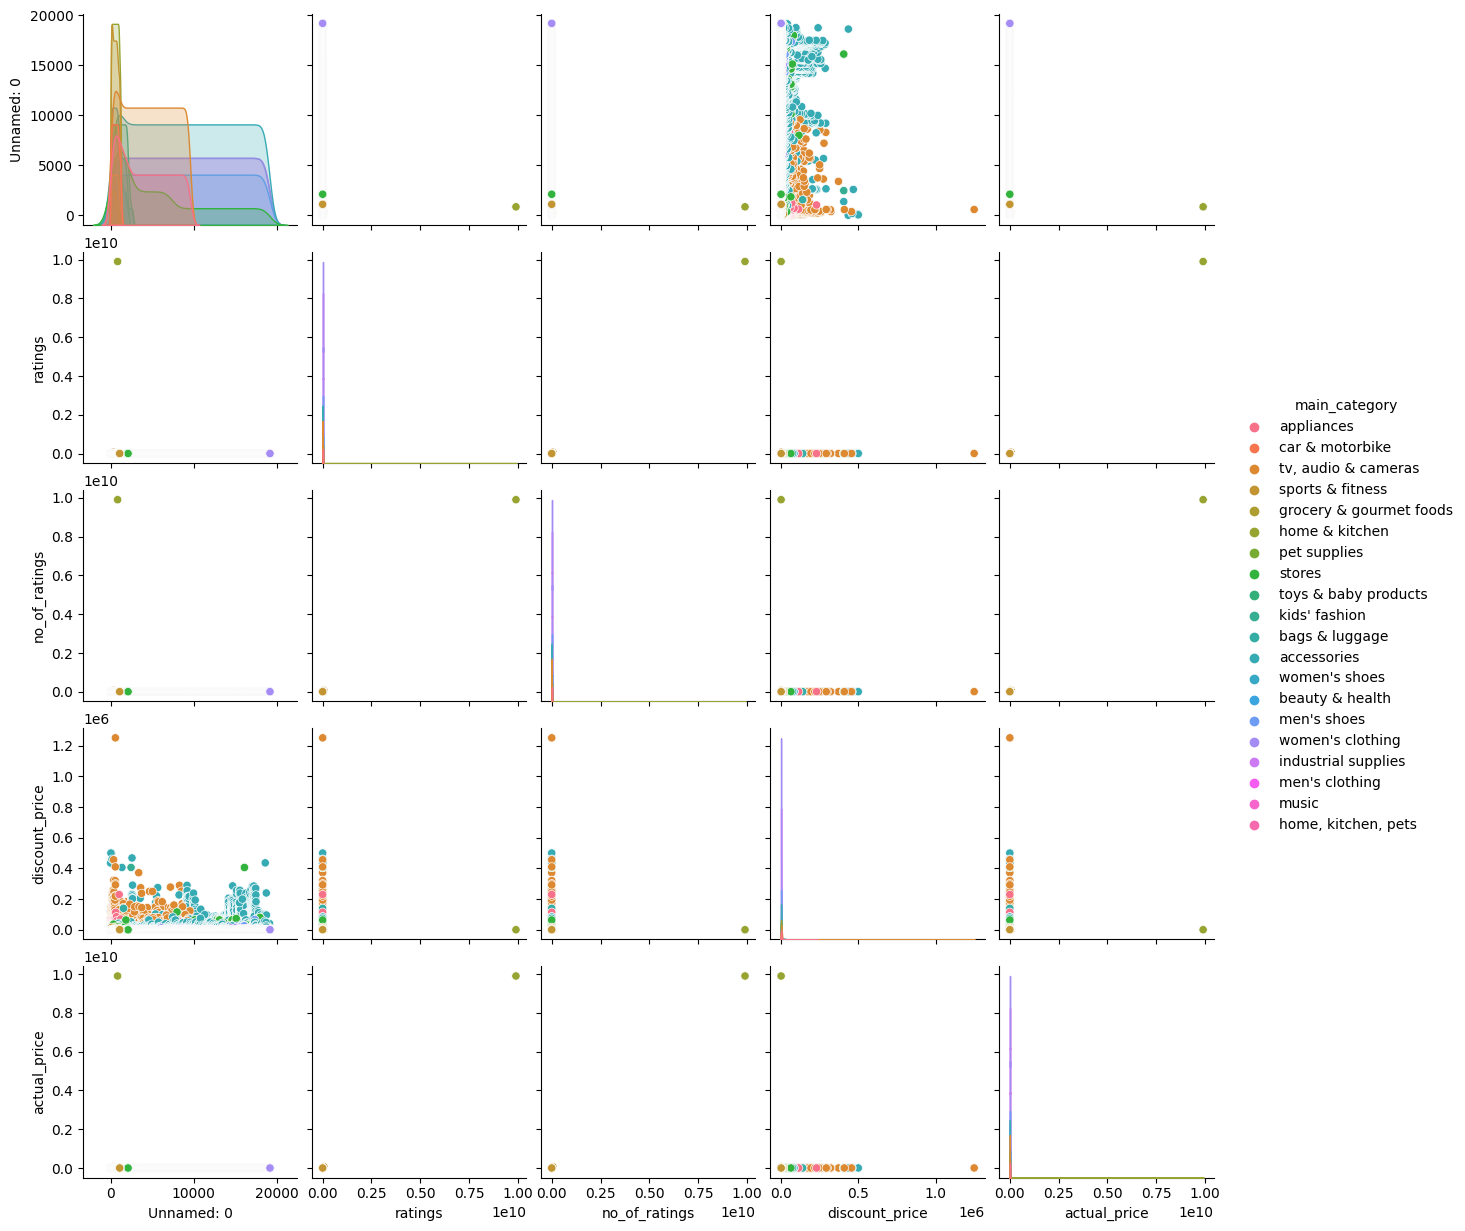

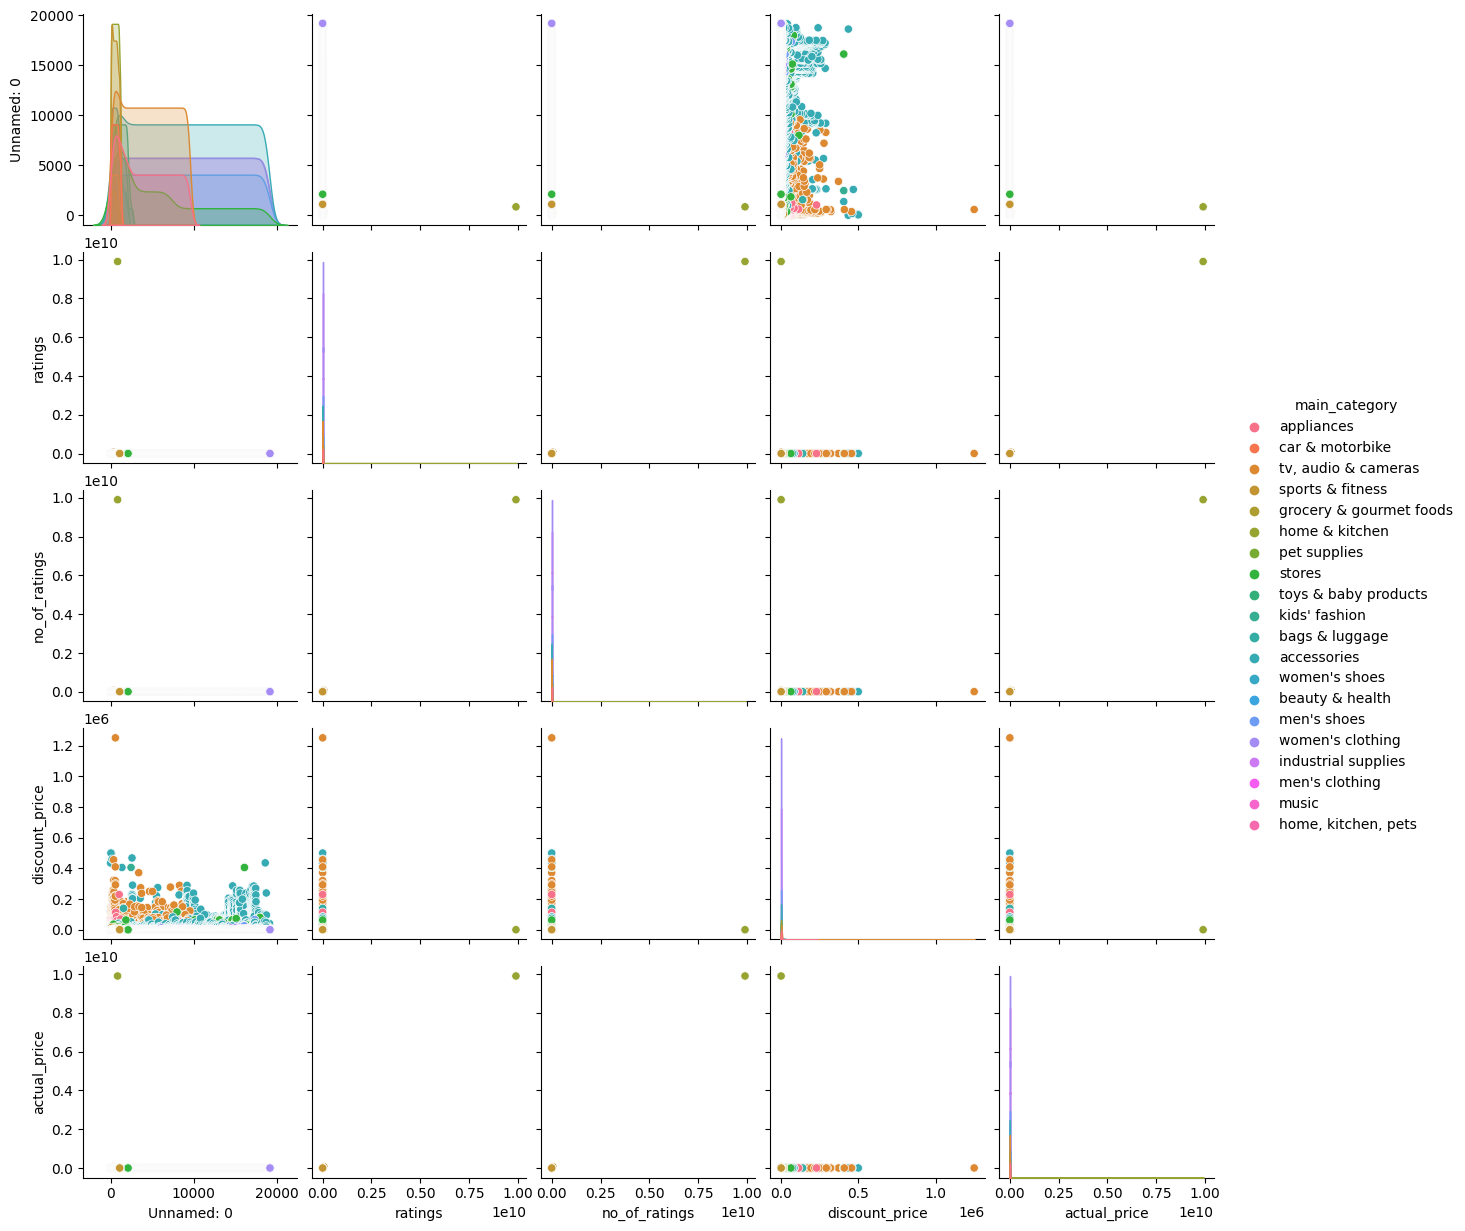

In [7]:
sns.pairplot(amzn, hue='main_category')

In [20]:
#Eliminamos la columna Unnamed: 0 que no proporciona información relevante y altera los resultados del análisis
amzn = amzn.drop("Unnamed: 0", axis=1)
amzn.sample(5)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
506649,Hidesign Women's NATALIE 01 Handbag,bags & luggage,Wallets,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Hidesign-Womens-Card-Hol...,1495.0,1495.0,709.0,1495.0
414789,FNX® Full HD 1080P Home Security CCTV IP Wirel...,"tv, audio & cameras",Security Cameras,https://m.media-amazon.com/images/I/41zcg9d3VH...,https://www.amazon.in/Security-Wireless-Waterp...,9999.0,9999.0,6999.0,9999.0
54442,Brandway Portable & Foldable Gazebo Tent & Pop...,accessories,Bags & Luggage,https://m.media-amazon.com/images/I/71+OpLOiPy...,https://www.amazon.in/Brandway-Portable-Foldab...,14999.0,14999.0,7999.0,14999.0
521580,Maa Creation Black Analogue Couple Watch for M...,accessories,Watches,https://m.media-amazon.com/images/I/417Og-7ffO...,https://www.amazon.in/Maa-Creation-Black-Analo...,799.0,799.0,235.0,799.0
207145,PC Jeweller The Cianan 22k (916) yellow-gold R...,accessories,Gold & Diamond Jewellery,https://m.media-amazon.com/images/I/718khEfESz...,https://www.amazon.in/PC-Jeweller-Cianan-yello...,52767.0,52767.0,44547.0,52767.0


# 3 ) Análisis con el modelo

## Análisis Exploratorio de los Datos (EDA)

### Correlación del precio real

Text(0.5, 1.0, 'Correlación con el precio real')

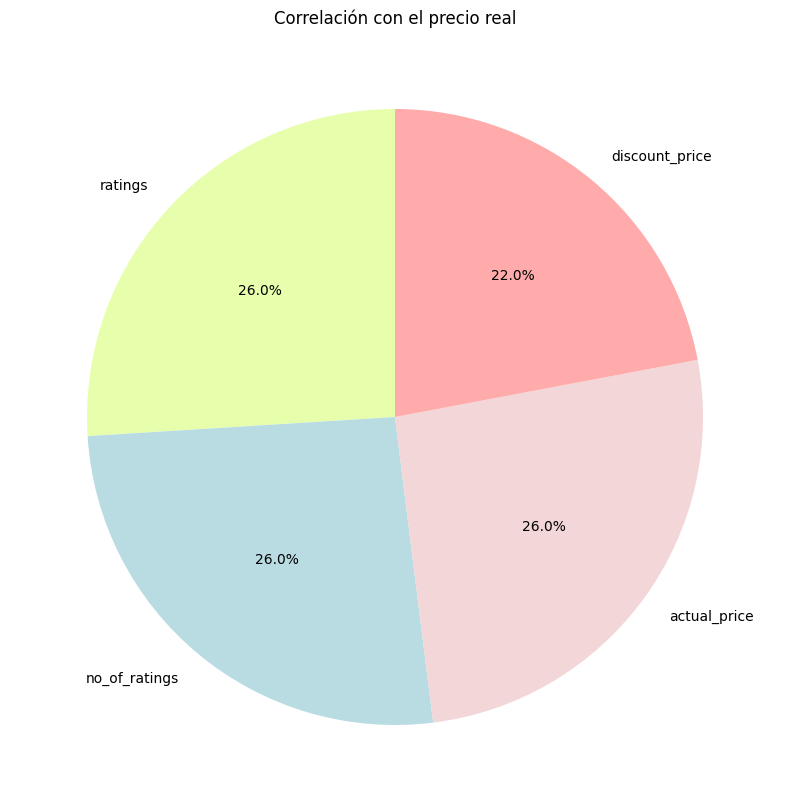

In [15]:
plt.figure(figsize=(10,10))
circular = amzn.corr(numeric_only=True, method='spearman')['actual_price'].sort_values(ascending=False)
pie = circular.plot(kind='pie', colors=['#E7FFAC', '#B9DCE3', '#F3D6D7', '#FFABAB', '#C5A3FF'], autopct='%1.1f%%', startangle=90)
pie.set_ylabel('')
pie.set_title('Correlación con el precio real')

### Relevancia en el dataset

<Axes: >

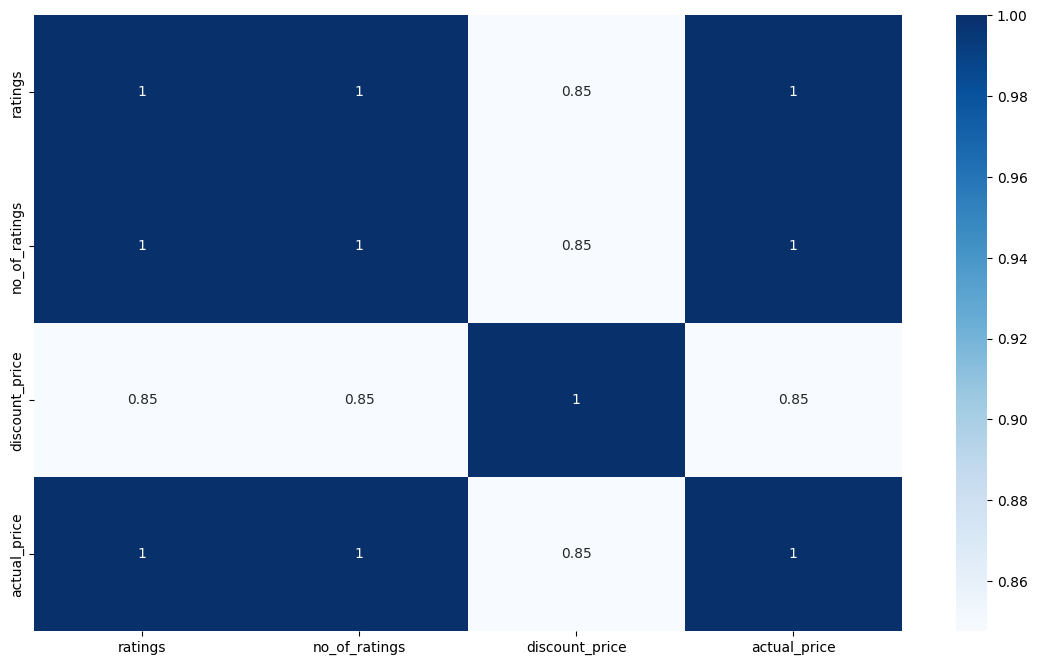

In [20]:
plt.figure(figsize=(14,8))
sns.heatmap(amzn.corr(numeric_only=True, method='spearman'), annot=True, cmap='Blues')

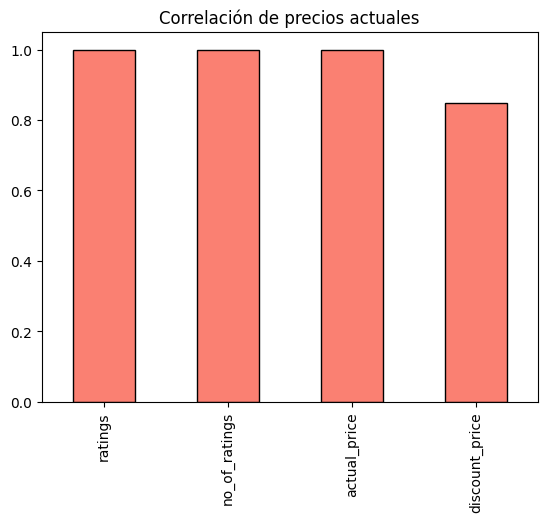

In [31]:

bars = amzn.corr(numeric_only=True, method='spearman')['actual_price'].sort_values(ascending=False).plot(kind='bar', color='#FA8072')
for patch in bars.patches:
    patch.set_edgecolor('black')

plt.title('Correlación de precios actuales')
plt.show()

#### Observaciones:

    Concluímos que la columna de los precios con descuento tiene una influencia importante con relación al precio real de los productos, por lo que tendremos que preparar los datos para su análisis.

## Preparación del dataset
    Para hacer la competencia justa, ajustamos las siguientes métricas:

### Porcentaje de descuento

In [21]:
#Creamos un nuevo dataframe para conservar el actual
amazon = amzn.copy()

#Asignamos una columna con los porcentajes de descuento
amazon ['discount_percentage'] = (amazon ['actual_price'] - amazon['discount_price'])/amazon['actual_price'] * 100

In [42]:
amazon.shape

(490422, 10)

In [46]:
amazon['ratings'].min()

10.0

In [47]:
amazon['ratings'].max()

9899999999.0

In [22]:
amazon.sample(5)

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_percentage
457396,Fusefit Boys Volar 2.0 Running Shoes,men's shoes,Sports Shoes,https://m.media-amazon.com/images/I/81nIvWmUZl...,https://www.amazon.in/Fusefit-Volar-Running-Sh...,3199.0,3199.0,639.0,3199.0,80.025008
450839,FASHION VICTIM Men's Treaking & Hiking Shoe,men's shoes,Sports Shoes,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Fashion-Victim-Synthetic...,1799.0,1799.0,863.0,1799.0,52.028905
230076,The House of tara Khaki Canvas Tote Sling Conv...,accessories,Handbags & Clutches,https://m.media-amazon.com/images/I/81GsRYkZxS...,https://www.amazon.in/House-Womens-Khaki-Canva...,1499.0,1499.0,1045.0,1499.0,30.286858
95213,BILGIC Men Smart Look Sports Shoes,men's shoes,Casual Shoes,https://m.media-amazon.com/images/I/51skbqxY3y...,https://www.amazon.in/Jalebi_001-Multicolor-Sy...,1499.0,1499.0,499.0,1499.0,66.711141
309538,blackberrys Men Casual Pants,men's clothing,Jeans,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/blackberrys-Urban-Nadal-...,2795.0,2795.0,2236.0,2795.0,20.000000


### Ordenamiento de categorías

#### main_category

In [46]:
#Determinamos el total de categorías
categorias_m = []
for i in amazon['main_category'].values:
    categorias_m += i.split('|')
    
    
categorias_m = list(set(categorias_m))
categorias_m

["women's clothing",
 "men's clothing",
 'appliances',
 'home & kitchen',
 'toys & baby products',
 'industrial supplies',
 'car & motorbike',
 'accessories',
 'pet supplies',
 "kids' fashion",
 "women's shoes",
 'home, kitchen, pets',
 'grocery & gourmet foods',
 "men's shoes",
 'music',
 'tv, audio & cameras',
 'beauty & health',
 'stores',
 'sports & fitness',
 'bags & luggage']

In [26]:
len (categorias_m)

20

#### sub_category

In [47]:
categorias_s= []
for i in amazon['sub_category'].values:
    categorias_s += i.split('|')
    
    
categorias_s = list(set(categorias_s))
categorias_s

['Diapers',
 'Personal Care Appliances',
 'Strollers & Prams',
 'Washing Machines',
 'Car & Bike Care',
 'Bags & Luggage',
 'All Pet Supplies',
 'All Car & Motorbike Products',
 'Car Parts',
 'All Sports, Fitness & Outdoors',
 'Diet & Nutrition',
 'Backpacks',
 'Musical Instruments & Professional Audio',
 'Travel Accessories',
 'Running',
 'Garden & Outdoors',
 'Coffee, Tea & Beverages',
 'Refrigerators',
 'Speakers',
 'Cricket',
 'Headphones',
 'Formal Shoes',
 'Sewing & Craft Supplies',
 'Baby Bath, Skin & Grooming',
 'Football',
 'Fashion & Silver Jewellery',
 'Cycling',
 'Televisions',
 'Janitorial & Sanitation Supplies',
 'Home Storage',
 "Women's Fashion",
 'Household Supplies',
 'T-shirts & Polos',
 'Dog supplies',
 'Health & Personal Care',
 'Motorbike Accessories & Parts',
 'Value Bazaar',
 'Camping & Hiking',
 'Clothing',
 'All Electronics',
 'Handbags & Clutches',
 'Western Wear',
 'Yoga',
 'Kitchen & Home Appliances',
 'Sports Shoes',
 'All Appliances',
 'Lab & Scientific',

In [28]:
len(categorias_s)

112

#### Subcategorías en cada categoría

In [29]:
sub_by_main = amzn.groupby('main_category')['sub_category'].unique()

for main_category, sub_category in sub_by_main.items():
    print(main_category + ':', sub_category)


accessories: ['Bags & Luggage' 'Fashion & Silver Jewellery' 'Gold & Diamond Jewellery'
 'Handbags & Clutches' 'Jewellery' 'Sunglasses' 'Watches']
appliances: ['Air Conditioners' 'All Appliances' 'Heating & Cooling Appliances'
 'Kitchen & Home Appliances' 'Refrigerators' 'Washing Machines']
bags & luggage: ['Backpacks' 'Rucksacks' 'Suitcases & Trolley Bags' 'Travel Accessories'
 'Travel Duffles' 'Wallets']
beauty & health: ['Beauty & Grooming' 'Diet & Nutrition' 'Health & Personal Care'
 'Household Supplies' 'Luxury Beauty' 'Make-up' 'Personal Care Appliances'
 'Value Bazaar']
car & motorbike: ['All Car & Motorbike Products' 'Car & Bike Care' 'Car Accessories'
 'Car Electronics' 'Car Parts' 'Motorbike Accessories & Parts']
grocery & gourmet foods: ['All Grocery & Gourmet Foods' 'Coffee, Tea & Beverages' 'Snack Foods']
home & kitchen: ['All Home & Kitchen' 'Bedroom Linen' 'Furniture' 'Garden & Outdoors'
 'Home Décor' 'Home Furnishing' 'Home Improvement' 'Home Storage'
 'Indoor Lighting' 

In [30]:
len (sub_by_main)

20

### Distribución de productos

In [72]:
productos = amazon['sub_category'].value_counts().reset_index().rename(columns={'index':'category', 'sub_category':'count'})
productos

,count,count
0,Fashion & Silver Jewellery,18678
1,Jewellery,18508
2,Clothing,18303
3,Ethnic Wear,18287
4,Bags & Luggage,18283
...,...,...
107,STEM Toys Store,43
108,Fashion Sales & Deals,36
109,Toys Gifting Store,21
110,Refurbished & Open Box,16


#### Agrupar productos por categoría

In [38]:
prod_cat = amazon.groupby('main_category')['name'].apply(list).reset_index(name='products')
prod_cat.sample(10)

,main_category,products
16,toys & baby products,"[Luv Lap Liquid Cleanser, Anti-Bacterial, Food..."
19,women's shoes,[Feel it Comfortable Leatherite Casual/Formal ...
1,appliances,[Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In ...
5,grocery & gourmet foods,[Nutraj 100% Natural Dried Premium California ...
9,kids' fashion,[EIO New Born Baby Gift Set -13 Piecess (Pink)...
8,industrial supplies,[Kitchen Need - Washable and Reusable - (Pack ...
11,men's shoes,"[Sparx mens Sd9039g Sneakers, Sparx Mens Sm-43..."
15,stores,[Aqualogica Glow+ Dewy Sunscreen SPF 50 PA+++ ...
12,music,"[Arturia MiniLab 3, 25 Slim-Key USB-C Midi Con..."
4,car & motorbike,[SOFTSPUN Microfiber Cloth - 4 pcs - 40x40 cms...


### ¿Qué pasa con los ratings?

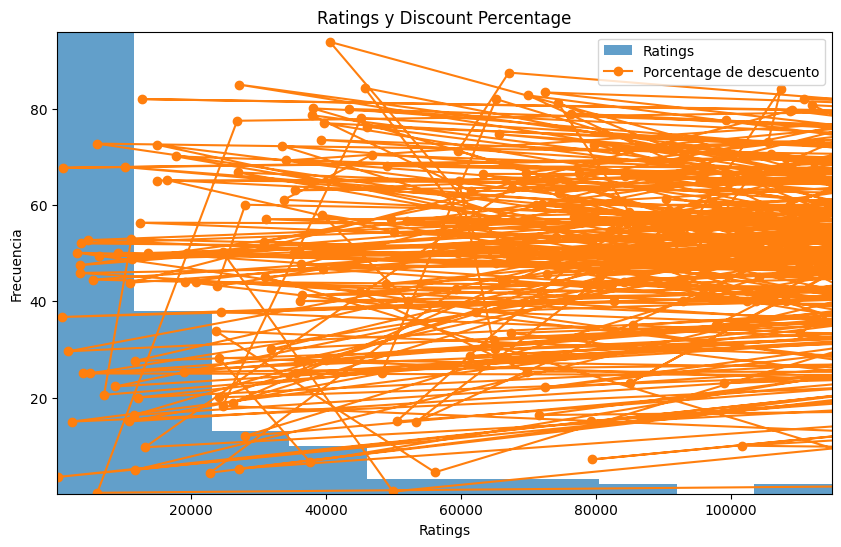

In [38]:
sampled_data = amazon.sample(n=1000)  # Ajusta el tamaño de la muestra 

plt.figure(figsize=(10, 6))

# Crear el histograma de 'ratings' como barras
plt.hist(sampled_data['ratings'], bins=10, alpha=0.7, label='Ratings')

# Crear el gráfico de línea de 'discount_percentage' como puntos
plt.plot(sampled_data['discount_percentage'], 'o-', label='Porcentage de descuento')

plt.xlabel('Ratings')
plt.ylabel('Frecuencia')
plt.title('Ratings y Discount Percentage')
plt.legend()

# Ajustar el tamaño de los ejes x e y
plt.xlim(min(sampled_data['ratings']), max(sampled_data['ratings']))
plt.ylim(min(sampled_data['discount_percentage']), max(sampled_data['discount_percentage']))

plt.show()


##### Observación: 

        - Se ofrecen descuentos para la mayor parte de los ratings, en menor o mayor medida

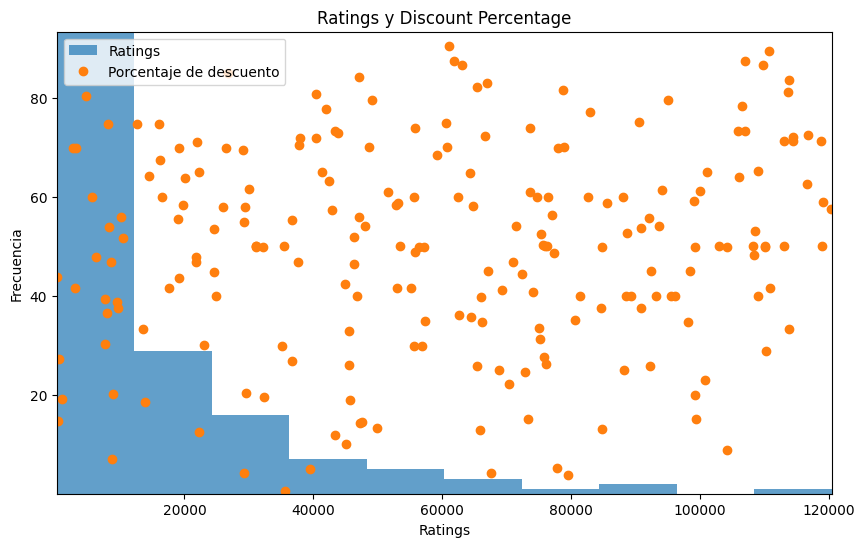

In [29]:
sampled_data = amazon.sample(n=1000)  # Ajusta el tamaño de la muestra 

plt.figure(figsize=(10, 6))

# Crear el histograma de 'ratings' como barras
plt.hist(sampled_data['ratings'], bins=10, alpha=0.7, label='Ratings')

# Crear el gráfico de línea de 'discount_percentage' como puntos sin líneas
plt.plot(sampled_data['discount_percentage'], 'o', label='Porcentaje de descuento')

plt.xlabel('Ratings')
plt.ylabel('Frecuencia')
plt.title('Ratings y Discount Percentage')
plt.legend()

# Ajustar el tamaño de los ejes x e y
plt.xlim(min(sampled_data['ratings']), max(sampled_data['ratings']))
plt.ylim(min(sampled_data['discount_percentage']), max(sampled_data['discount_percentage']))

plt.show()


##### Observación:

        - Hay más ratings con calificaciones promedio por debajo de los 10,000 puntos en sumatoria
        - Los descuentos se ajustan a 

### ¿Qué pasa con el número de calificaciones?

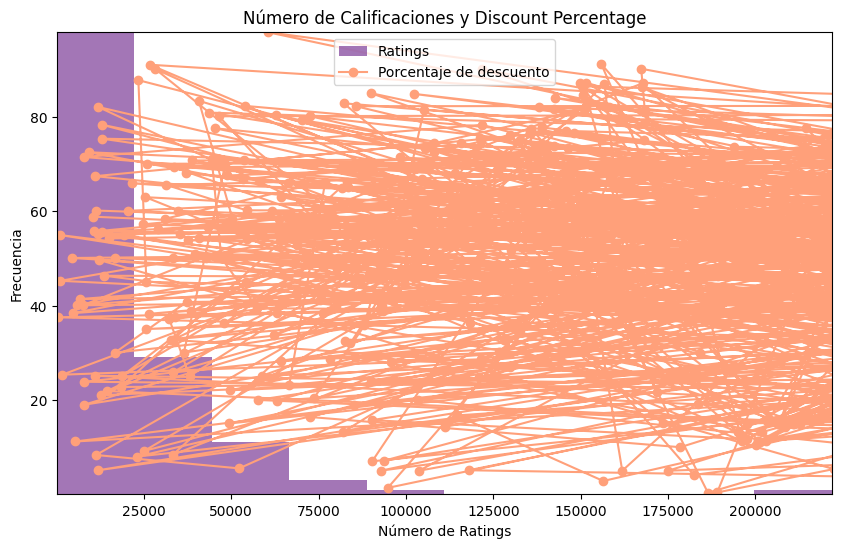

In [35]:
sampled_data = amazon.sample(n=1000) 
plt.figure(figsize=(10, 6))

plt.hist(sampled_data['no_of_ratings'], bins=10, alpha=0.7, label='Ratings', color='#7D3C98')

plt.plot(sampled_data['discount_percentage'], 'o-', label='Porcentaje de descuento', color='#FFA07A')

plt.xlabel('Número de Ratings')
plt.ylabel('Frecuencia')
plt.title('Número de Calificaciones y Discount Percentage')
plt.legend()

# Ajustar el tamaño de los ejes x e y
plt.xlim(min(sampled_data['no_of_ratings']), max(sampled_data['no_of_ratings']))
plt.ylim(min(sampled_data['discount_percentage']), max(sampled_data['discount_percentage']))

plt.show()


##### Observación: 

        - También se incluyen porcentages de descuento aparentemente aleatorios, en función de distintos ratings.

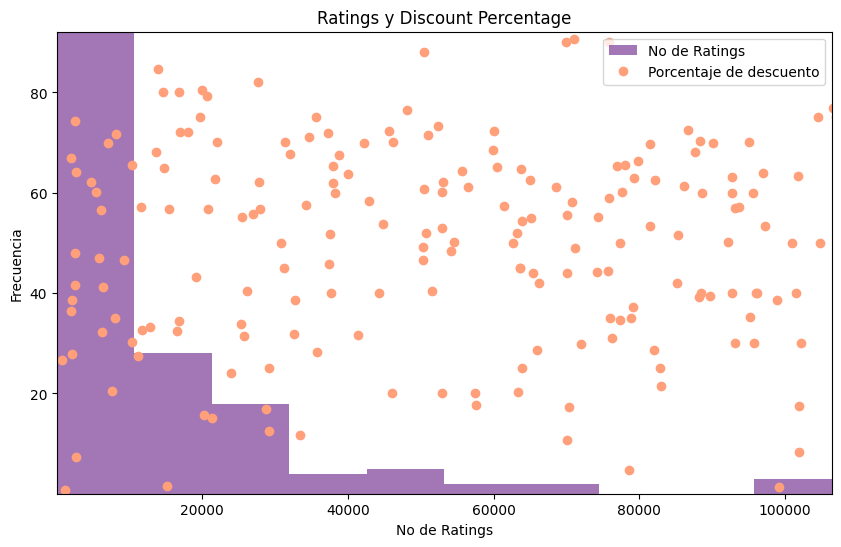

In [39]:
sampled_data = amazon.sample(n=1000)  # Ajusta el tamaño de la muestra 

plt.figure(figsize=(10, 6))

# Crear el histograma de 'ratings' como barras
plt.hist(sampled_data['no_of_ratings'], bins=10, alpha=0.7, label='No de Ratings', color='#7D3C98')

# Crear el gráfico de línea de 'discount_percentage' como puntos sin líneas
plt.plot(sampled_data['discount_percentage'], 'o', label='Porcentaje de descuento', color='#FFA07A')

plt.xlabel('No de Ratings')
plt.ylabel('Frecuencia')
plt.title('Ratings y Discount Percentage')
plt.legend()

# Ajustar el tamaño de los ejes x e y
plt.xlim(min(sampled_data['no_of_ratings']), max(sampled_data['no_of_ratings']))
plt.ylim(min(sampled_data['discount_percentage']), max(sampled_data['discount_percentage']))

plt.show()


##### Observación: 

        - Es más común que los productos no tengan más de 10,000 reseñas (global)
        - Los descuentos se conccentran en la media de la cantidad de reseñas.
        - Es decir, que un producto tenga más o menos reseñas (positivas o negativas), no influye directamente en el porcentage de descuento.
        - Pero sí influye en el hecho de tener un descuento.

## Modelado y resultados

### Asignación de pesos

In [42]:
# Métricas de valor
weight_discount_percentage = 0.7
weight_ratings = 0.3

### Puntuaciones

In [43]:
# Calculamos la puntuación para cada producto
amazon['score'] = (amazon['discount_percentage'] * weight_discount_percentage) + (amazon['ratings'] * weight_ratings)

# Ordenamos los productos por puntuación en orden descendente
amazon_sorted = amazon.sort_values('score', ascending=False)

### Muestra

In [55]:
amazon_s = amazon[['name', 'score', 'main_category', 'discount_price']].sample(10)
amazon_s

,name,score,main_category,discount_price
423642,United Colors of Benetton Mens Blue Full Sleev...,913.704668,men's clothing,2399.0
51594,"F Gear Emprise Wordly Blue, Yellow 23 Ltrs Cas...",423.776305,accessories,350.8
331577,LEWEL Girl's Cotton Printed Full Sleeve T-Shir...,533.983927,kids' fashion,359.0
442079,Enter-Go - Boomer Brick - HD Stereo Sound Blue...,329.876884,"tv, audio & cameras",549.0
90952,SHOE DAY Leather Combat Army Boot Shoes/Army S...,1093.712575,men's shoes,1299.0
405973,"Crotomak 6U DVR, CCTV, NVR, Server, Network Ra...",2434.704376,"tv, audio & cameras",3999.0
474996,cultsport Signature Boxing Hand Wraps,205.526377,sports & fitness,378.0
68512,"Yauhody 8K HDMI 2.1 Cable 3m, 48Gbps Ultra Hig...",28465.909117,"tv, audio & cameras",799.0
112980,BLINKIN Women's Gym Wear Tights | Track Pants ...,558.250000,women's clothing,378.0
457308,Vector X CS-2030 Badminton/Tennis Court Shoes ...,497.204548,men's shoes,1590.0


### Máximo score

In [56]:
max(amazon['score'])

2970000069.6999955

### Mínimo score

In [57]:
min(amazon['score'])

8.513333333333332

### Score Promedio

In [59]:
amazon['score'].mean()

7429.681436246713

### Los mejores productos

In [48]:
# Selecciona los tres mejores productos
top_3_products = amazon_sorted.head(3)

print(top_3_products[['name', 'main_category', 'sub_category', 'discount_percentage', 'ratings']])

                                                     name   
194625  Marutivilla Insect Killer, Mosquito Killer Lig...  \
402750  Clovia Women's Activewear Ankle Length Printed...   
498818  Samsung 214 cm (85 inches) 8K Ultra HD Smart N...   

              main_category       sub_category  discount_percentage   
194625       home & kitchen  Garden & Outdoors            99.999994  \
402750     sports & fitness            Running            99.998874   
498818  tv, audio & cameras        Televisions            21.625807   

             ratings  
194625  9.900000e+09  
402750  6.108299e+07  
498818  1.594900e+06  


### Por categoría

In [76]:
top_products_by_category = {}

# Iterar por cada categoría en categorias_m
for category in categorias_m:
    # Filtrar los productos de la categoría actual
    category_products = amazon_sorted[amazon_sorted['main_category'] == category]
    
    # Seleccionar los tres mejores productos de la categoría
    top_category_products = category_products.head(3)
    
    # Almacenar los productos en el diccionario
    top_products_by_category[category] = top_category_products

# Crear un DataFrame a partir del diccionario
top_products_by_category_df = pd.concat(top_products_by_category.values(), ignore_index=True)

# Imprimir el DataFrame
print(top_products_by_category_df[['name', 'main_category', 'sub_category', 'discount_percentage', 'ratings']])


                                                 name   
0   FNKYRA FASHION BEAUTIFUL BANARASI SILK PARTY W...  \
1   FUSIONIC Stunning Red Velvet Base Zari Work De...   
2   MANVAA Women's Velvet Lehenga Choli (SKTRZI725...   
3   ME Enterprises Black/Brown Western Premium Lea...   
4   ligent Heating Thermal Underwear Set 8-Zone US...   
5     AVANTI CREATION Mens Slim Fit Stretchable Jeans   
6               SMBI Semi Automatic Thermocol Machine   
7                           Glycol Freezer 60/70/80 L   
8   ELECTROLUX 680L Frost Free Inverter French Doo...   
9   Marutivilla Insect Killer, Mosquito Killer Lig...   
10  The Sleep Company Elev8 Smart Adjustable Bed |...   
11  Fabrique Visionary 3+2+1 Leatherette 6 Seater ...   
12  STORE99® Pink : 4 Color Fashion Multifunction ...   
13  Pampers Diapers Size 4, 150 Count - Pampers Pu...   
14  Ingenuity Foldaway Rocking Wood Bassinet - Wal...   
15           Analytical Balance - Semi Micro - MAB250   
16  Siglent Technologies SDG204

## Resultados

### Creacion de un libro de Excel

In [65]:
from openpyxl import Workbook

# Crear un nuevo libro de cálculo
workbook = Workbook()

workbook.save('dataframes.xlsx')

# Crear el objeto ExcelWriter con el nombre del archivo
writer = pd.ExcelWriter('dataframes.xlsx', engine='openpyxl')


# Guardar los dataframes en la misma hoja
sheet_name = 'Dataframes'
start_row = 0


### Guardando dataframes relevantes

In [66]:
amazon.to_excel(writer, sheet_name='Amazon', index=False) 

In [67]:
top_3_products.to_excel(writer, sheet_name=sheet_name, startrow=start_row, index=False)
start_row += len(top_3_products) + 2

In [77]:
top_products_by_category_df.to_excel(writer, sheet_name=sheet_name, startrow=start_row, index=False)
start_row += len(top_products_by_category_df) + 2

In [78]:
amazon_sorted.to_excel(writer, sheet_name=sheet_name, startrow=start_row, index=False)
start_row += len(amazon_sorted) + 2

In [73]:
productos.to_excel(writer, sheet_name=sheet_name, startrow=start_row, index=False)
start_row += len(productos) + 2

In [74]:
categorias_s_df = pd.DataFrame(categorias_s, columns=['Subcategories'])
categorias_s_df.to_excel(writer, sheet_name=sheet_name, startrow=start_row, index=False)
start_row += len(categorias_s_df) + 2

In [75]:
categorias_m_df = pd.DataFrame(categorias_m, columns=['Maincategories'])
categorias_m_df.to_excel(writer, sheet_name=sheet_name, startrow=start_row, index=False)
start_row += len(categorias_m_df) + 2

### Guardar y cerrar el archivo

In [80]:
workbook.save('dataframes.xlsx')
workbook.close()

## Dashboard con Web Scrapping


![dashboardWS](dash.gif)